In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


Train samples = 50000, Test samples = 10000
Epoch 1/100
500/500 [==============================] - 99s - loss: 2.0758 - acc: 0.2222 - val_loss: 1.8682 - val_acc: 0.3429
Epoch 2/100
500/500 [==============================] - 98s - loss: 1.8331 - acc: 0.3310 - val_loss: 1.6851 - val_acc: 0.3889
Epoch 3/100
500/500 [==============================] - 96s - loss: 1.7240 - acc: 0.3687 - val_loss: 1.5755 - val_acc: 0.4356
Epoch 4/100
500/500 [==============================] - 95s - loss: 1.6519 - acc: 0.3915 - val_loss: 1.5038 - val_acc: 0.4560
Epoch 5/100
500/500 [==============================] - 96s - loss: 1.5714 - acc: 0.4282 - val_loss: 1.4406 - val_acc: 0.4809
Epoch 6/100
500/500 [==============================] - 95s - loss: 1.5195 - acc: 0.4515 - val_loss: 1.4242 - val_acc: 0.4830
Epoch 7/100
500/500 [==============================] - 96s - loss: 1.4811 - acc: 0.4629 - val_loss: 1.3496 - val_acc: 0.5225
Epoch 8/100
500/500 [==============================] - 95s - loss: 1.4353 - acc: 

500/500 [==============================] - 99s - loss: 0.8611 - acc: 0.6976 - val_loss: 0.7522 - val_acc: 0.7486
Epoch 66/100
500/500 [==============================] - 103s - loss: 0.8552 - acc: 0.7070 - val_loss: 0.7327 - val_acc: 0.7469
Epoch 67/100
500/500 [==============================] - 101s - loss: 0.8467 - acc: 0.7074 - val_loss: 0.7377 - val_acc: 0.7482
Epoch 68/100
500/500 [==============================] - 97s - loss: 0.8754 - acc: 0.7006 - val_loss: 0.7519 - val_acc: 0.7536
Epoch 69/100
500/500 [==============================] - 99s - loss: 0.8637 - acc: 0.6974 - val_loss: 0.7222 - val_acc: 0.7534
Epoch 70/100
500/500 [==============================] - 101s - loss: 0.8582 - acc: 0.7083 - val_loss: 0.7556 - val_acc: 0.7407
Epoch 71/100
500/500 [==============================] - 98s - loss: 0.8489 - acc: 0.7086 - val_loss: 0.7124 - val_acc: 0.7559
Epoch 72/100
500/500 [==============================] - 99s - loss: 0.8495 - acc: 0.7098 - val_loss: 0.7394 - val_acc: 0.7484
Ep

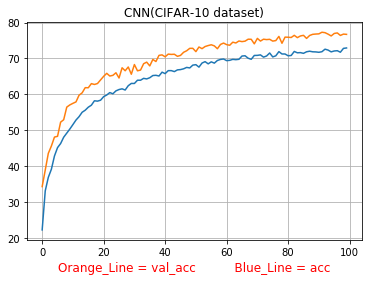

In [2]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Train samples = %d, Test samples = %d' % (x_train.shape[0], x_test.shape[0]))
#print(x_train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    #print('Not using data augmentation.')
    his = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    #print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    his = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=500,
                        #steps_per_epoch=x_train.shape[0] // batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('')
print('loss:', scores[0])
print('accuracy:', scores[1])

# acc
acc = his.history["acc"]
val_acc = his.history["val_acc"]

acc_List = []
valacc_List = []

for i in acc:
    acc_List.append(i*100)
    
for i in val_acc:
    valacc_List.append(i*100)
    
plt.grid(True)
plt.plot(acc_List)
plt.plot(valacc_List)
plt.xlabel('Orange_Line = val_acc          Blue_Line = acc', fontsize=12, color='red')
plt.title(r'CNN(CIFAR-10 dataset)')
plt.show()